验证码图像channel: (60, 160, 3)


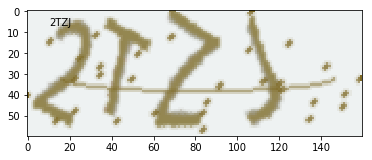

In [2]:
import random
from os import path
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from captcha.image import ImageCaptcha  # pip install captcha


from cfg import gen_char_set


# this is not case-sensitive


def random_captcha_text(
        # char_set=number + alphabet + ALPHABET,
        char_set=gen_char_set,
        # char_set=number,
        captcha_size=4):
    """
    生成随机字符串，4位
    :param char_set:
    :param captcha_size:
    :return:
    """
    captcha_text = []
    for i in range(captcha_size):
        c = random.choice(char_set)
        captcha_text.append(c)
    return captcha_text


def gen_captcha_text_and_image():
    """
    生成字符对应的验证码
    :return:
    """
    image = ImageCaptcha()

    captcha_text = random_captcha_text()
    captcha_text = ''.join(captcha_text)

    captcha = image.generate(captcha_text)

    captcha_image = Image.open(captcha)
    captcha_image = np.array(captcha_image)
    return captcha_text, captcha_image


def wrap_gen_captcha_text_and_image():
    """
    有时生成图像大小不是(60, 160, 3)
    :return:
    """
    while True:
        text, image = gen_captcha_text_and_image()
        if image.shape != (60, 160, 3):
            continue
        return text, image


def __gen_and_save_image():
    """
    可以批量生成验证图片集，并保存到本地，方便做本地的实验
    :return:
    """

    for i in range(50000):
        text, image = wrap_gen_captcha_text_and_image()

        im = Image.fromarray(image)

        uuid = uuid.uuid1().hex
        image_name = '__%s__%s.png' % (text, uuid)

        img_root = join(capt.cfg.workspace, 'train')
        image_file = path.join(img_root, image_name)
        im.save(image_file)


def __demo_show_img():
    """
    使用matplotlib来显示生成的图片
    :return:
    """
    text, image = wrap_gen_captcha_text_and_image()

    print("验证码图像channel:", image.shape)  # (60, 160, 3)

    f = plt.figure()
    ax = f.add_subplot(111)
    ax.text(0.1, 0.9, text, ha='center', va='center', transform=ax.transAxes)
    plt.imshow(image)

    plt.show()


if __name__ == '__main__':
  
    __demo_show_img()
    gen_and_save_image()
    pass
